In [1]:
import ibmos2spark, os
# @hidden_cell

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_8cef0e3522844ac4be8f0bd9cec66d89 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_8cef0e3522844ac4be8f0bd9cec66d89 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

credentials = {
}

configuration_name = 'os_8cef0e3522844ac4be8f0bd9cec66d89_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
# Since JSON data can be semi-structured and contain additional metadata, it is possible that you might face issues with the DataFrame layout.
# Please read the documentation of 'SparkSession.read()' to learn more about the possibilities to adjust the data loading.
# PySpark documentation: http://spark.apache.org/docs/2.0.2/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.json

df_data_1 = spark.read.json(cos.url('medium-sparkify-event-data.json', 'sparkify-donotdelete-pr-wtbp2aggjvp9tm'))
df_data_1.take(5)

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20210405173221-0000
KERNEL_ID = 9c1952ec-b087-4000-a501-065548194413


[Row(artist='Martin Orford', auth='Logged In', firstName='Joseph', gender='M', itemInSession=20, lastName='Morales', length=597.55057, level='free', location='Corpus Christi, TX', method='PUT', page='NextSong', registration=1532063507000, sessionId=292, song='Grand Designs', status=200, ts=1538352011000, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='293'),
 Row(artist="John Brown's Body", auth='Logged In', firstName='Sawyer', gender='M', itemInSession=74, lastName='Larson', length=380.21179, level='free', location='Houston-The Woodlands-Sugar Land, TX', method='PUT', page='NextSong', registration=1538069638000, sessionId=97, song='Bulls', status=200, ts=1538352025000, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='98'),
 Row(artist='Afroman', auth='Logged In', firstName='Maverick', gender='M', 

In [2]:
! pip install chart_studio

     |████████████████████████████████| 64 kB 1.0 MB/s  eta 0:00:01
     |████████████████████████████████| 13.2 MB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 153 kB 41.4 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 2.1 MB/s  eta 0:00:01
     |████████████████████████████████| 147 kB 42.2 MB/s eta 0:00:01
     |████████████████████████████████| 178 kB 42.4 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=ae28712040685ca25551924fe9aac4d3aaa5821a8bd0a2a32b31c699fb389877
  Stored in directory: /home/spark/shared/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
ERROR: conda 4.8.2 requires ruamel_yaml>=0.11.14, which is not installed.
ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.0 which is incompatible.
ERROR: botocore

In [3]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go

import datetime
from time import time
%matplotlib inline
import re

#import pyspark libraries
import pyspark
from pyspark import SparkConf

# import sql Spark libraries
from pyspark.sql import SparkSession, Window
from pyspark.sql.types import StringType, IntegerType,DataType
from pyspark.sql.functions import udf
from pyspark.sql.functions import date_format
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.functions import min as Fmin
from pyspark.sql.functions import max as Fmax
from pyspark.sql.functions import avg, col, min, max, regexp_replace, concat, count, desc, asc, explode, lit, split, stddev, udf, lower, isnan, when, rank, from_unixtime

# import ml Spark libraries
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler, MinMaxScaler, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier, DecisionTreeClassifier, LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.regression import LinearRegression
from pyspark.ml.clustering import KMeans
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# import sklearn ml metrics libraries for metrics calculation
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [4]:
# create a Spark session
spark = SparkSession \
    .builder \
    .appName("My Sparkify app") \
    .getOrCreate()

In [5]:
# get the Spark context
spark.sparkContext.getConf().getAll()

[('spark.dynamicAllocation.enabled', 'false'),
 ('spark.network.crypto.keyLength', '256'),
 ('spark.shuffle.service.enabled', 'false'),
 ('spark.network.crypto.enabled', 'true'),
 ('spark.driver.memory', '4g'),
 ('spark.driver.port', '41013'),
 ('spark.app.id', 'app-20210405173221-0000'),
 ('spark.executor.extraClassPath',
  '/usr/local/share/jupyter/kernels/scala/lib/*:/home/spark/shared/user-libs/spark2/*:/home/spark/shared/user-libs/common/*:/home/spark/shared/user-libs/connectors/*:/opt/ibm/connectors/db2/*:/opt/ibm/connectors/others-db-drivers/*:/opt/ibm/third-party/libs/spark2/*:/opt/ibm/third-party/libs/common/*:/opt/ibm/third-party/libs/connectors/*'),
 ('spark.driver.extraJavaOptions',
  ' -Dderby.system.home=/home/spark/.local/share/jupyter/runtime/kernel-9c1952ec-b087-4000-a501-065548194413-20210405_172813 -Dlog4j.logFile=/home/spark/shared/logs/kernel-python3.7-python3.7-20210405_172813.log -Dlog4j.configuration=file:/opt/ibm/jkg/log4j/log4j.properties -Dfile.encoding=UTF-8

In [6]:
spark

In [7]:
# get medium-dataset file
df = df_data_1

In [8]:
# Let's check the dataset
df.persist()

DataFrame[artist: string, auth: string, firstName: string, gender: string, itemInSession: bigint, lastName: string, length: double, level: string, location: string, method: string, page: string, registration: bigint, sessionId: bigint, song: string, status: bigint, ts: bigint, userAgent: string, userId: string]

In [9]:
# Let's build a function to count the nulls/missing/empty values
def count_null_col(df,column):
    '''
    Function that counts the nulls or missing values that exist in a column
    Input:  
            df: dataset where we want to count null/missing/empty values
            column: column of the dataset we want to count null/missing/empty values
    Output: 
            n_missing: it returns the number of missing values
    '''
    missing = df.filter(((df[column].isNull()) | isnan(df[column])) | (df[column] == ""))
    n_missing = missing.count()
    
    return n_missing

In [10]:
# Let's build a function to count the nulls/missing/empty values of every column of the dataset
def count_null_df(df):
    '''
    Function that counts the nulls or missing values that exist in a dataset
    Input:  
            df: dataset where we want to count null/missing/empty values
    Output: 
            missing: it returns a dictionary with the number of missing values of every column
            in case the column has nulls/missing/empty values
    '''   
    missing = {}
    for col in df.columns:
        n_missing = count_null_col(df,col)
        if n_missing > 0:
            missing.update({col: n_missing})
    
    return missing      

In [11]:
# Let's build a function to count if the categorical and numerical columns of the dataset
def cat_or_num(df):
    '''
    Function that clasifies the kind of columns (categorical or numerical) that exist in a dataset
    Input:  
            df: dataset where we want to clasify columns
    Output: 
            num_cols,cat:cols: it returns a dictionary with the category of every column
    
    '''   
    cat_cols = []
    num_cols = []

    for coltype in df.schema:
        ctype = str(coltype.dataType)
        if ctype == "StringType":
            cat_cols.append(coltype.name)

        elif ctype == "LongType" or ctype == "DoubleType":
            num_cols.append(coltype.name)
            
    return cat_cols, num_cols

In [12]:
def load_data_spark(path_to_dataset):
    '''
    Function that load a dataset
    Input:  
            path_to_dataset: path to the file containing the data
    Output: 
            df: loaded dataset
    '''  
    df = spark.read.json(path_to_dataset)  
    
    return df

In [13]:
# function for cleansing the dataset
def drop_na_duplicates(input_dataset):
    '''
    Function that eliminates nulls and duplicates from a dataset
    Input:  
            input_dataset: original dataset
    Output: 
            output_dataset: dataset without nans and duplicates
    '''     

    output_dataset = input_dataset.dropna(how = "any", subset = ["userId", "sessionId"])
    # Let's get the unique records of UserId
    output_dataset = output_dataset.select("userId").dropDuplicates().sort("userId").show()
    #output_dataset = output_dataset.filter(output_dataset["userId"] != "")
    
    
    return output_dataset

In [14]:
def feature_engineerme(df_input):
    '''
    Function that collects the feature to build the ML model
    Input:  
            df_input: dataframe
    Output: 
            df_output: output datadrame with the features
    '''  
    # This dataframe will contain the following features:
    # |-- userId: string (nullable = true)
    # |-- churn: cancellation of the service
    # |-- level: type of subscription + I will convert into number 0/1
    # |-- n_artists: number of artist a user listens to + I will convert into number
    # |-- n_songs:number of songs a user listens to + I will convert into number  
    # |-- n_songs_play:number of songs added to the playlist + I will convert into number   
    # |-- n_thumbs_up: number of thumbs up + I will convert into number
    # |-- n_thumbs_down:  number of thumbs down + I will convert into number 
    # |-- n_Errors: long (nullable = true)
    # |-- n_friends: number of friends + I will convert into number 
    # |-- n_Rolls: number of spots displayed to the user
    # |-- n_Help: number of visits to help page
    # |-- total_sdays: time of the subscription (in days)
    # |-- n_sessions: number of sesions of a user
    # |-- IPAD: the user connects with an IPAD to our Sparkify service
    # |-- IPHONE: the user connects with an IPHONE to our Sparkify service
    # |-- LINUX: the user connects with a Linux device to our Sparkify service
    # |-- MAC: the user connects with a MAC device to our Sparkify service
    # |-- WINDOWS: the user connects with a WINDOWS to our Sparkify service


    churn = df_input.groupby('userId').max("churn").withColumnRenamed("max(churn)", "churn")
    df_churn = churn.withColumn('churn', churn.churn.cast('int'))
    df_churn.count()
        
    ## Let's change level into a numerical,binary field (0/1)
    level = df_input.select(['userId', 'level','ts']).orderBy(desc('ts')).dropDuplicates(['userId']).select(['userId', 'level']).replace(['free', 'paid'], ['0', '1'], 'level')
    df_level = level.withColumn('level', level.level.cast('int'))
    df_level.count()
    
    # Let's calculate the number of artists a user listens to 
    n_artists = df_input.filter(df_valid.page=="NextSong").select(['userId', 'artist']).dropDuplicates().groupby('userId').count().withColumnRenamed('count', 'n_artists')
    df_n_artists= n_artists.withColumn('n_artists', n_artists.n_artists.cast('int'))
    df_n_artists.count()
    
    n_songs = df_input.select('userId','song').groupBy('userId').count().withColumnRenamed('count', 'n_songs')
    df_n_songs= n_songs.withColumn('n_songs', n_songs.n_songs.cast('double'))
    df_n_songs.count()
    
    n_songs_play = df_input.select('userId', 'page').where(df_valid.page =='Add to Playlist').groupBy('userId').agg({'page':'count'}).withColumnRenamed('count(page)','n_songs_play')
    df_n_songs_play = n_songs_play.withColumn('n_songs_play', n_songs_play.n_songs_play.cast('double'))
    df_n_songs_play.count()
        
    n_thumbs_up = df_input.select('userId','page').where(df_valid.page == 'Thumbs Up').groupBy('userId').count().withColumnRenamed('count', 'n_thumbs_up')
    df_n_thumbs_up= n_thumbs_up.withColumn('n_thumbs_up', n_thumbs_up.n_thumbs_up.cast('bigint'))
    df_n_thumbs_up.count()
    
    n_thumbs_down = df_input.select('userId','page').where(df_valid.page == 'Thumbs Down').groupBy('userId').count().withColumnRenamed('count', 'n_thumbs_down')
    df_n_thumbs_down= n_thumbs_down.withColumn('n_thumbs_down', n_thumbs_down.n_thumbs_down.cast('bigint'))
    df_n_thumbs_down.count()
    
    n_Errors = df_input.select('userId','page').where(df_valid.page == 'Error').groupBy('userId').count().withColumnRenamed('count', 'n_Errors')
    df_n_Errors = n_Errors.withColumn('n_Errors', n_Errors.n_Errors.cast('bigint'))
    df_n_Errors.count()
    
    n_friends = df_input.select('userId','page').where(df_valid.page == 'Add Friend').groupBy('userId').count().withColumnRenamed('count', 'n_friends')
    df_n_friends= n_friends.withColumn('n_friends', n_friends.n_friends.cast('bigint'))
    df_n_friends.count()
    
    n_Rolls = df_input.select('userId','page').where(df_valid.page == 'Roll Advert').groupBy('userId').count().withColumnRenamed('count', 'n_Rolls')
    df_n_Rolls = n_Rolls.withColumn('n_Rolls', n_Rolls.n_Rolls.cast('bigint'))
    df_n_Rolls.count()
    
    # Let's calculate the number of Help a user visits
    n_Help = df_input.select('userId','page').where(df_valid.page == 'Help').groupBy('userId').count().withColumnRenamed('count', 'n_Help')
    df_n_Help = n_Help.withColumn('n_Help', n_Help.n_Help.cast('bigint'))
    df_n_Help.count()
    
    # Let's calculate the subscription days a user stays in the service
    subscription_days = df_input.select('userId','subscription_days').groupBy('userId').agg({'subscription_days':'max'}).withColumnRenamed('max(subscription_days)','total_sdays')
    df_subscription_days = subscription_days.withColumn('total_sdays', subscription_days.total_sdays.cast('double'))
    df_subscription_days.count()

    n_sessions = df_input.select('userId','sessionId').dropDuplicates().groupby('userId').count().withColumnRenamed('count','n_sessions')
    df_n_sessions = n_sessions.withColumn('n_sessions', n_sessions.n_sessions.cast('bigint'))
    df_n_sessions.count()
    
    # Let's take the OS the user connects to the Sparkify session and make one hot encoding with the pivot option
    df_os = df_valid.select('userId','OS').dropDuplicates().groupby('userId').pivot('OS').agg(count('OS')).fillna(0)   
    
    df_output = df_churn.join(df_level,'userId','outer')\
     .join(df_n_artists,'userId','outer') \
     .join(df_n_songs,'userId','outer') \
     .join(df_n_songs_play,'userId','outer')\
     .join(df_n_thumbs_up,'userId','outer') \
     .join(df_n_thumbs_down,'userId','outer') \
     .join(df_n_Errors,'userId','outer') \
     .join(df_n_friends,'userId','outer') \
     .join(df_n_Rolls,'userId','outer') \
     .join(df_n_Help,'userId','outer') \
     .join(df_subscription_days,'userId','outer') \
     .join(df_n_sessions,'userId','outer') \
     .join(df_os,'userId','outer')
    

    return df_output

In [25]:
# Let's take a overview of the schema of the dataset file
df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [26]:
# printSchema of the data
df.count()

543705

In [27]:
# Let's see how many missing values there are in the dataset
missing = count_null_df(df)
print("These are the columns with nulls/missing/empty values: {}\n".format(missing))

These are the columns with nulls/missing/empty values: {'artist': 110828, 'firstName': 15700, 'gender': 15700, 'lastName': 15700, 'length': 110828, 'location': 15700, 'registration': 15700, 'song': 110829, 'userAgent': 15700, 'userId': 15700}



In [28]:
df_valid = df.dropna(how = "any", subset = ["userId", "sessionId"])

In [29]:
# Let's get the unique records of UserId
df.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|100001|
|100002|
|100003|
|100004|
|100005|
|100006|
|100007|
|100008|
|100009|
|100010|
|100011|
|100012|
|100013|
|100014|
|100015|
|100016|
|100017|
+------+
only showing top 20 rows



In [30]:
# Let's eliminate nans and duplicates from the dataset
df_valid = drop_na_duplicates(df)

+------+
|userId|
+------+
|      |
|    10|
|   100|
|100001|
|100002|
|100003|
|100004|
|100005|
|100006|
|100007|
|100008|
|100009|
|100010|
|100011|
|100012|
|100013|
|100014|
|100015|
|100016|
|100017|
+------+
only showing top 20 rows



In [31]:
df.select("userId").show()

+------+
|userId|
+------+
|   293|
|    98|
|   179|
|   179|
|   246|
|   163|
|      |
|      |
|      |
|      |
|   179|
|   175|
|   100|
|   100|
|   163|
|   246|
|   179|
|    39|
|   163|
|   179|
+------+
only showing top 20 rows



In [32]:
df.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|100001|
|100002|
|100003|
|100004|
|100005|
|100006|
|100007|
|100008|
|100009|
|100010|
|100011|
|100012|
|100013|
|100014|
|100015|
|100016|
|100017|
+------+
only showing top 20 rows



In [33]:
# We can see that there are users with empty userid, let's eliminate them from our scope
df_valid = df.filter(df["userId"] != "")

In [34]:
df_valid.count()

528005

In [35]:
# Let's categorize the columns, depending on their type (categorical or numerical)
cat_cols,num_cols = cat_or_num(df)

In [36]:
print ("The categorical columns are: {}".format(cat_cols))

The categorical columns are: ['artist', 'auth', 'firstName', 'gender', 'lastName', 'level', 'location', 'method', 'page', 'song', 'userAgent', 'userId']


In [37]:
print ("The numerical columns are: {}".format(num_cols))

The numerical columns are: ['itemInSession', 'length', 'registration', 'sessionId', 'status', 'ts']


In [38]:
# Let's see how many registries the file has --> we have 528.005 records
df_valid.count()

528005

In [39]:
# Let's take a look at the first lines of the file, to see what they look like
df_valid.head(2)

[Row(artist='Martin Orford', auth='Logged In', firstName='Joseph', gender='M', itemInSession=20, lastName='Morales', length=597.55057, level='free', location='Corpus Christi, TX', method='PUT', page='NextSong', registration=1532063507000, sessionId=292, song='Grand Designs', status=200, ts=1538352011000, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='293'),
 Row(artist="John Brown's Body", auth='Logged In', firstName='Sawyer', gender='M', itemInSession=74, lastName='Larson', length=380.21179, level='free', location='Houston-The Woodlands-Sugar Land, TX', method='PUT', page='NextSong', registration=1538069638000, sessionId=97, song='Bulls', status=200, ts=1538352025000, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='98')]

In [40]:
# Prepare the data for a better visualization of the location column
# The location column has the form: Name,Short_Name, eg: 'Lexington-Fayette, KY'
# so we'll get the column location and split it by comma and then get the second part
# and then we'll take only the first part
df_valid = df_valid.withColumn("state", split(col("location"),',').getItem(1))
#df_valid = df_valid.withColumn("state", split(col("state"),'-').getItem(1))
df_valid.select("state").collect()

[Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' FL'),
 Row(state=' FL'),
 Row(state=' AL'),
 Row(state=' MN'),
 Row(state=' FL'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' MN'),
 Row(state=' AL'),
 Row(state=' FL'),
 Row(state=' CA'),
 Row(state=' MN'),
 Row(state=' FL'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' FL'),
 Row(state=' TX'),
 Row(state=' AL'),
 Row(state=' CA'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' MN'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' FL'),
 Row(state=' CA'),
 Row(state=' CA'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' MN'),
 Row(state=' AL'),
 Row(state=' AL'),
 Row(state=' TX'),
 Row(state=' FL'),
 Row(state=' TX'),
 Row(state=' NC-SC'),
 Row(state=' TX'),
 Row(state=' CA'),
 Row(state=' TX'),
 Row(state=' MN'),
 Row(state=' NC-SC'),
 Row(state=' TX'),
 Row(state=' TX'),
 Row(state=' VA-NC'),
 Row(state=' VA-NC'),


In [41]:
# Now we are going to add two new columns derived from ts field:
# We would like to know the hour and datetime in UTF timestamp
# for that we prepare a lambda function
get_date       = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).strftime("%Y-%m-%d %H:%M:%S"))
get_month      = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0). month)
get_day        = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0). day)
get_hour       = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0). hour)
get_weekday    = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).strftime('%w'))

In [42]:
# we apply the lambda function to convert the ts into hour and data
# we apply also the lambda function to convert the registration field into a new field "registration_time" with the timestamp 
df_valid = df_valid.withColumn("registration_time", get_date(df_valid.registration))
df_valid = df_valid.withColumn("date", get_date(df_valid.ts))
df_valid = df_valid.withColumn("month", get_month(df_valid.ts))
df_valid = df_valid.withColumn("day_of_month", get_day(df_valid.ts))
df_valid = df_valid.withColumn("hour", get_hour(df_valid.ts))
df_valid = df_valid.withColumn('day_of_week', get_weekday(df_valid.ts))

In [43]:
# Let's prepare sparksql 
# To do that, we need to create a temporary table, where we'll perform the SQL queries
df_valid.createOrReplaceTempView("Sparkify_sql")

In [44]:
# Let's prepare the registration_time for human understanding, that is year-month-day hour:minute:second, 
# And also let's add the weekday
# Due to differences between versions 2.0 and 3.0 of Spark we have to set additional time parser
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")

df_time = df_valid.select('registration_time', date_format('registration_time', 'E').alias('weekday'))
df_time.show()

+-------------------+-------+
|  registration_time|weekday|
+-------------------+-------+
|2018-07-20 05:11:47|    Fri|
|2018-09-27 17:33:58|    Thu|
|2018-09-03 05:44:15|    Mon|
|2018-09-03 05:44:15|    Mon|
|2018-09-02 23:30:18|    Sun|
|2018-08-02 02:08:30|    Thu|
|2018-09-03 05:44:15|    Mon|
|2018-09-21 13:20:32|    Fri|
|2018-09-26 17:17:35|    Wed|
|2018-09-26 17:17:35|    Wed|
|2018-08-02 02:08:30|    Thu|
|2018-09-02 23:30:18|    Sun|
|2018-09-03 05:44:15|    Mon|
|2018-06-15 01:52:21|    Fri|
|2018-08-02 02:08:30|    Thu|
|2018-09-03 05:44:15|    Mon|
|2018-09-27 17:33:58|    Thu|
|2018-09-21 13:20:32|    Fri|
|2018-09-27 17:33:58|    Thu|
|2018-09-26 17:17:35|    Wed|
+-------------------+-------+
only showing top 20 rows



In [45]:
# Now let's calculate how long the user is subscribed to our Sparkify service
# To calculate that, we have to substract current date to the registration date

def get_days_from_registration(df_valid):
    days_from_registration = df_valid.ts - df_valid.registration
    days_from_registration = days_from_registration/(1000*3600*24)
    
    return days_from_registration
    
    
df_valid = df_valid.withColumn("subscription_days", get_days_from_registration(df_valid))

In [46]:
# Let's see the old registered user --> 390 days
df_valid.select('subscription_days').sort("subscription_days").collect()[-1]

Row(subscription_days=390.31975694444446)

In [47]:
# Let's see the subscriptions days of other users
df_valid.select('userID', 'subscription_days').take(3)

[Row(userID='293', subscription_days=72.78361111111111),
 Row(userID='98', subscription_days=3.2683680555555554),
 Row(userID='179', subscription_days=27.762303240740742)]

In [48]:
# Let's see the states
df_valid.select('userId','state').distinct().groupby('state').count().show()

+------------+-----+
|       state|count|
+------------+-----+
|       NE-IA|    2|
|    IA-IL-MO|    1|
|       PA-NJ|    3|
|          ME|    1|
|       AR-OK|    1|
|          WA|   10|
| DC-VA-MD-WV|    6|
|          AL|    9|
|          NM|    3|
|          MI|   11|
|          HI|    1|
|          VT|    1|
|       MN-WI|    7|
|    IL-IN-WI|   19|
|       MD-WV|    2|
|          NH|    3|
|          AK|    2|
|          AR|    1|
|          AZ|   10|
|       MA-NH|    7|
+------------+-----+
only showing top 20 rows



# Question: How is the proportion between Males and Females in our musical streaming service ?

In [49]:
ngender = df_valid.select('gender','userId').distinct().groupby('gender').count().toPandas()
ngender.head(5)

,gender,count
0,F,198
1,M,250


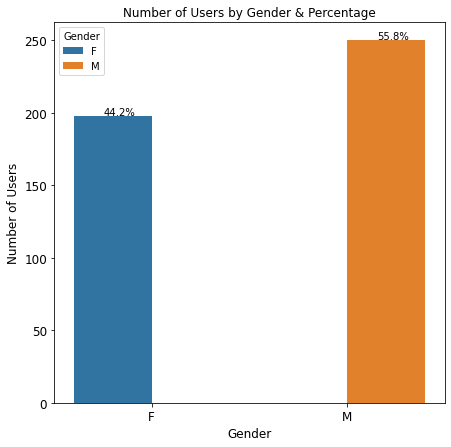

In [50]:
# Let's plot this proportion with a graphic
# and show the percentage above
plt.figure(figsize = (7,7))
plt.title('Number of Users by Gender & Percentage')
ax = sns.barplot(x='gender', y='count',hue='gender', data=ngender);

# this code is to calculate the percentage 
# and present the numbers above the bars and centered in the middle
total = ngender.iloc[0]['count'] + ngender.iloc[1]['count']
for p in ax.patches:
    if p.get_height()>0:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2.6
        y = p.get_y() + p.get_height() + 0.7
        ax.annotate(percentage, (x, y))

plt.xticks(size=12)
plt.xlabel('Gender',size=12)
plt.yticks(size=12)
plt.ylabel('Number of Users', size=12)
plt.legend(title='Gender', loc='best');
plt.savefig('Users_by_Gender.png')

#### Question: What about the location of the users? Does this feature affects on the level of service?

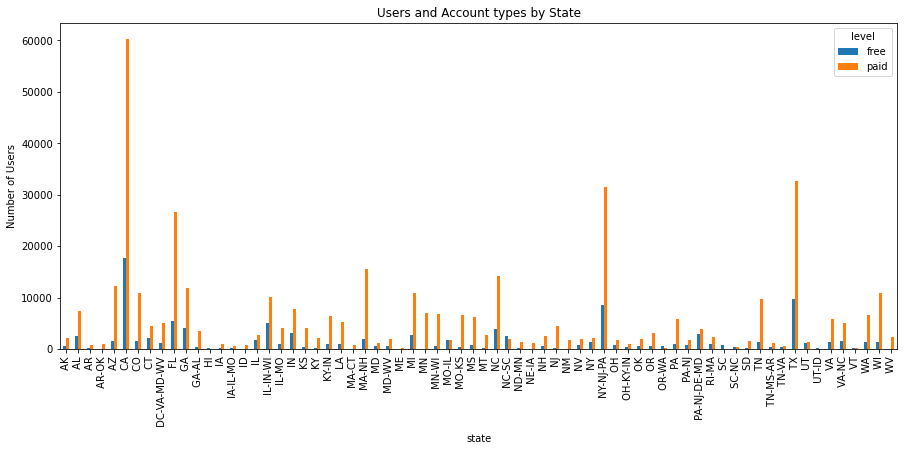

In [51]:
df_location_level = df_valid.select('userId','state','level').groupby('state','level').count().orderBy(desc('count')).toPandas()
fig = plt.figure(figsize=(15,6))
plt.ylabel('Number of Users')
ax = fig.gca()
df_location_level.pivot(index='state', columns='level', values='count').plot(kind='bar', ax=ax)
plt.title('Users and Account types by State')
plt.savefig('df_state_level.png')

In [52]:
# Maybe it's interesting augment our dataset with the device the users utilize our Sparkify service
# let's map the operating system, through the Browser

map = {'macintosh':'MAC', 'iphone':'IPHONE','ipad':'IPAD',
       'x11':'LINUX','compatible':'WINDOWS',
       'windows nt 5.0':'WINDOWS','windows nt 5.1':'WINDOWS',
       'windows nt 6.1':'WINDOWS', 'windows nt 6.0':'WINDOWS',
       'windows nt 6.2':'WINDOWS','windows nt 6.3':'WINDOWS'}

classify_os = udf(lambda x: map[re.findall('\(([^\)]*)\)', x)[0].split(';')[0].lower()])

df_valid = df_valid.withColumn('OS', classify_os(df_valid.userAgent))

In [53]:
# And now we would like to know the count of OS's connections depending on the subscription level of the users
df_os_level = df_valid.select('userId','OS','level').groupby('OS','level').count().orderBy(desc('count')).toPandas()
df_os_level.head(15)

,OS,level,count
0,WINDOWS,paid,214357
1,MAC,paid,160568
2,WINDOWS,free,56076
3,MAC,free,41491
4,LINUX,paid,19809
5,IPAD,paid,13404
6,IPHONE,paid,9906
7,LINUX,free,5219
8,IPHONE,free,4575
9,IPAD,free,2600


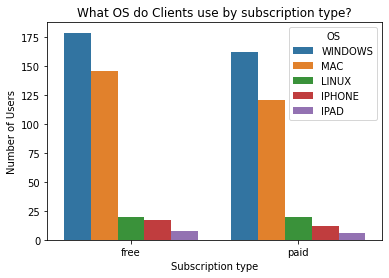

In [54]:
# level subscription of the user by Operating System
level_os = df_valid.dropDuplicates(['userId','OS','level']).groupby(['OS', 'level']).count().orderBy(desc('count')).toPandas()

ax = sns.barplot(x='level', y='count',hue='OS', data=level_os);
plt.xlabel('Subscription type')
plt.ylabel('Number of Users')
plt.title('What OS do Clients use by subscription type?')
plt.legend(title='OS', loc='best');
plt.savefig('df_OS_by_subscription_type.png')

In [55]:
downgrade_select = udf(lambda x: 1 if x == 'Submit Downgrade' else 0, IntegerType())

In [56]:
df_valid = df_valid.withColumn('downgrade_select', downgrade_select('page'))

In [57]:
df_valid.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- state: string (nullable = true)
 |-- registration_time: string (nullable = true)
 |-- date: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_month: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- subscription_days: 

In [58]:
# We need to have all information from users that have downgraded Sparkify service
# so we need to save an interval of time
windowSpec  = Window.partitionBy('userId')

df_valid = df_valid.withColumn('will_downgrade', max('downgrade_select').over(windowSpec))

In [59]:
df_downgrade = df_valid.select('userId','gender','downgrade_select').distinct().groupby('gender','downgrade_select').count().toPandas().sort_values(by='count')
df_downgrade.head()

,gender,downgrade_select,count
2,F,1,46
0,M,1,51
1,F,0,198
3,M,0,250


In [60]:
churn_confirmation = udf(lambda x: 1 if x == "Cancellation Confirmation" else 0, IntegerType())
df_valid = df_valid.withColumn("churn", churn_confirmation(df_valid.page))
df_users_churned = df_valid.withColumn("churned", churn_confirmation("page"))

In [61]:
df_valid = df_valid.withColumn('will_churn', max('churn').over(windowSpec))

In [62]:
# Let's remember the schema of the data
df_valid.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- state: string (nullable = true)
 |-- registration_time: string (nullable = true)
 |-- date: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_month: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- subscription_days: 

### Question: How many users churned? And what's the rate of churned users vs the total number of users ? 

In [63]:
# Let's count the number of user cancellations (churns) --> there are 52 users who have cancel the service
users_churned = df_users_churned.filter(df_users_churned["churned"] ==1).count()
# Let's calculate the total number of users
total_users = df_valid.select('userId').distinct().count()
# Let's calculate the percentage
percentage_churn = df_users_churned.groupby("userId").agg({"churned":"sum"}).select(avg("sum(churned)")).collect()[0]["avg(sum(churned))"]

print("Number of users who churned: {} vs Total Users: {}".format(users_churned, total_users))
print("Percentage of users who churned: {:.2f}%".format(percentage_churn * 100))

Number of users who churned: 99 vs Total Users: 448
Percentage of users who churned: 22.10%


In [64]:
# Let's drop the UserId duplicates and then count the users who churned
# And prepare the data to be plotted with a sns, so we need to convert to a Pandas Dataframe
total_churn = df_valid.dropDuplicates(['userId','churn']).groupby(['churn']).count().toPandas()
print("Number of users who churned: {} ".format(total_churn))

Number of users who churned:    churn  count
0      1     99
1      0    448 


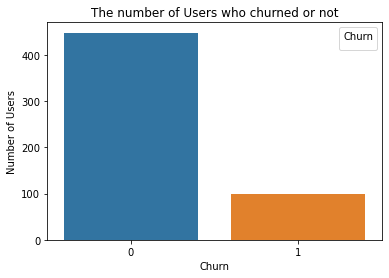

In [65]:
# We like to see it graphically
sns.barplot(x='churn', y='count', data=total_churn);
plt.xlabel('Churn')
plt.ylabel('Number of Users')
plt.title('The number of Users who churned or not')
plt.legend(title='Churn', loc='best');
plt.savefig('Users_who_churned.png');

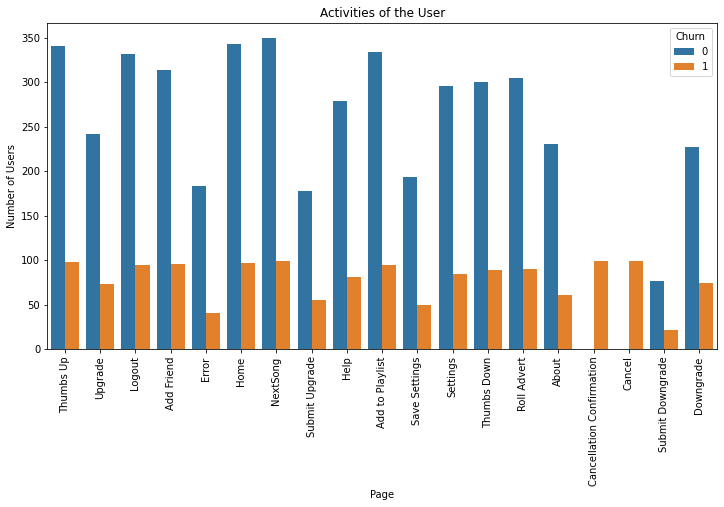

In [66]:
page_total_churn = df_valid.dropDuplicates(['userId','page']).groupby(['page','will_churn']).count().toPandas()

fig = plt.figure(figsize=(12, 6))
g = sns.barplot(x='page', y='count',hue='will_churn', data=page_total_churn);
plt.xticks(rotation=90)
plt.xlabel('Page')
plt.ylabel('Number of Users')
plt.title('Activities of the User')
plt.legend(title='Churn', loc='best');
plt.savefig('Activities_User_Page.png')

#### Question: Is there a difference in time between the users who churned and who did not churn? 

In [67]:
# Let's prepare a query to take the the membership time in days
df_membership = df_valid.select(["userId", "registration", "ts", "churn"]) \
    .withColumn('membership_time',(df_valid.ts-df_valid.registration)) \
    .groupBy('userId', 'churn') \
    .agg({'membership_time':'max'}) \
    .withColumnRenamed('max(membership_time)', 'membership_time') \
    .select('userId', (col('membership_time')/1000/86400).alias('membership_time'),'churn') \
    .sort('membership_time') \
    .toPandas()   

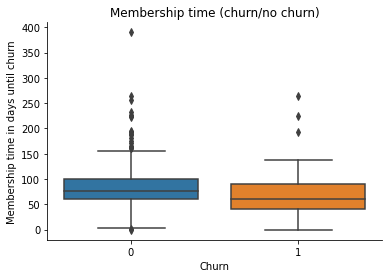

In [68]:
# And plot the results with a seaborn boxplot, we can see the outliers
ax = sns.boxplot(data=df_membership, y='membership_time', x='churn', orient='v')
plt.ylabel('Membership time in days until churn')
plt.xlabel('Churn')
plt.title('Membership time (churn/no churn)')
sns.despine(ax=ax);
plt.savefig('Membership_time.png')

# Let's engineer the features for our ML model

In [69]:
# Test if the feature function works fine
df_final_feat = feature_engineerme(df_valid)

In [70]:
# Yes! it works fine!
df_final_feat

DataFrame[userId: string, churn: int, level: int, n_artists: int, n_songs: double, n_songs_play: double, n_thumbs_up: bigint, n_thumbs_down: bigint, n_Errors: bigint, n_friends: bigint, n_Rolls: bigint, n_Help: bigint, total_sdays: double, n_sessions: bigint, IPAD: bigint, IPHONE: bigint, LINUX: bigint, MAC: bigint, WINDOWS: bigint]

In [71]:
# Let's check if churn proportion maintains (as I had some problems with this)
df_final_feat.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|   99|
|    0|  349|
+-----+-----+



In [72]:
# Let's see the size of the final features dataframe
rows = df_final_feat.count()
cols = len(df_final_feat.columns)
print("The number of rows is {} and the number of columns is {}".format(rows, cols))

The number of rows is 448 and the number of columns is 19


In [73]:
# We don't need userId, as we will predict if a user will churn, but we are not interested in the id of that user
final_features = df_final_feat.drop('userId', 'sessionId')

In [74]:
# But we need to imputate nulls with a value, 0 for instance
final_features= final_features.na.fill(0)

# Modeling

In [75]:
# Change the name of the churn column into label, that will be the feature to predict
final_features = df_final_feat.withColumnRenamed("churn","label")

In [76]:
final_features.printSchema()

root
 |-- userId: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- level: integer (nullable = true)
 |-- n_artists: integer (nullable = true)
 |-- n_songs: double (nullable = true)
 |-- n_songs_play: double (nullable = true)
 |-- n_thumbs_up: long (nullable = true)
 |-- n_thumbs_down: long (nullable = true)
 |-- n_Errors: long (nullable = true)
 |-- n_friends: long (nullable = true)
 |-- n_Rolls: long (nullable = true)
 |-- n_Help: long (nullable = true)
 |-- total_sdays: double (nullable = true)
 |-- n_sessions: long (nullable = true)
 |-- IPAD: long (nullable = true)
 |-- IPHONE: long (nullable = true)
 |-- LINUX: long (nullable = true)
 |-- MAC: long (nullable = true)
 |-- WINDOWS: long (nullable = true)



In [77]:
numerical_features = final_features

In [78]:
ff_pandas = numerical_features.toPandas()

In [79]:
ff_pandas.shape

(448, 19)

In [80]:
columns_features = numerical_features.columns

In [81]:
columns_features

['userId',
 'label',
 'level',
 'n_artists',
 'n_songs',
 'n_songs_play',
 'n_thumbs_up',
 'n_thumbs_down',
 'n_Errors',
 'n_friends',
 'n_Rolls',
 'n_Help',
 'total_sdays',
 'n_sessions',
 'IPAD',
 'IPHONE',
 'LINUX',
 'MAC',
 'WINDOWS']

In [82]:
# Let's calculate the correlation matrix to see if there are 
# correlation between features
corr = final_features.toPandas().corr()
corr

,label,level,n_artists,n_songs,n_songs_play,n_thumbs_up,n_thumbs_down,n_Errors,n_friends,n_Rolls,n_Help,total_sdays,n_sessions,IPAD,IPHONE,LINUX,MAC,WINDOWS
label,1.000000,0.086944,-0.056433,-0.050845,-0.075502,-0.079773,0.014619,0.044879,-0.087982,0.115218,-0.069355,-0.195473,-0.059936,-0.076259,0.192379,-0.017154,-0.035690,-0.011385
level,0.086944,1.000000,0.482443,0.418714,0.401203,0.384810,0.352027,0.224363,0.353334,-0.057927,0.291097,0.001566,0.293053,0.017451,-0.068159,0.043284,-0.028498,0.029383
n_artists,-0.056433,0.482443,1.000000,0.985109,0.968378,0.923555,0.861253,0.749641,0.936474,0.274780,0.903854,0.123020,0.886850,0.041433,-0.058682,-0.027540,-0.002717,0.026946
n_songs,-0.050845,0.418714,0.985109,1.000000,0.986459,0.945873,0.868927,0.785069,0.957146,0.273684,0.924606,0.101530,0.903143,0.062257,-0.055498,-0.038871,-0.006103,0.028448
n_songs_play,-0.075502,0.401203,0.968378,0.986459,1.000000,0.946049,0.844806,0.783777,0.938851,0.211663,0.913051,0.075670,0.882522,0.064095,-0.057853,-0.044231,-0.001213,0.027151
n_thumbs_up,-0.079773,0.384810,0.923555,0.945873,0.946049,1.000000,0.801103,0.704128,0.909460,0.181003,0.864857,0.087582,0.901227,0.041311,-0.029091,-0.028194,-0.012883,0.025694
n_thumbs_down,0.014619,0.352027,0.861253,0.868927,0.844806,0.801103,1.000000,0.648103,0.824784,0.325390,0.790113,0.008404,0.818220,0.067898,-0.065465,-0.048390,0.002984,0.029551
n_Errors,0.044879,0.224363,0.749641,0.785069,0.783777,0.704128,0.648103,1.000000,0.739405,0.145541,0.716695,-0.055177,0.661789,0.132542,-0.055268,-0.034543,-0.016867,0.013356
n_friends,-0.087982,0.353334,0.936474,0.957146,0.938851,0.909460,0.824784,0.739405,1.000000,0.234975,0.886181,0.077084,0.871843,0.054188,-0.064148,-0.054657,-0.032560,0.068382
n_Rolls,0.115218,-0.057927,0.274780,0.273684,0.211663,0.181003,0.325390,0.145541,0.234975,1.000000,0.206464,0.010053,0.450299,0.003820,-0.015228,-0.034497,-0.016646,0.037043


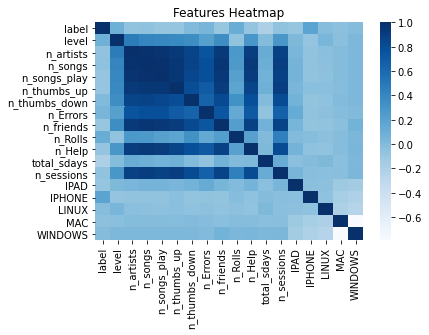

In [83]:
# Let's plot a heatmap with the correlation of the variables
# we can see there are some correlated features, such as number of songs and the number of artist, 
# that are related, the number of songs added to the playlist
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,  cmap="Blues");
plt.title('Features Heatmap')
plt.savefig('Heatmap.png')

In [101]:
# First we have to vectorize our features with a VectorAssembler
# because SparkML requires a vector of features
assembler = VectorAssembler(inputCols=columns_features[1:], outputCol="NumFeatures")
# we assure that we don't have null values 
df = assembler.setHandleInvalid("skip").transform(numerical_features)
df

DataFrame[userId: string, label: int, level: int, n_artists: int, n_songs: double, n_songs_play: double, n_thumbs_up: bigint, n_thumbs_down: bigint, n_Errors: bigint, n_friends: bigint, n_Rolls: bigint, n_Help: bigint, total_sdays: double, n_sessions: bigint, IPAD: bigint, IPHONE: bigint, LINUX: bigint, MAC: bigint, WINDOWS: bigint, NumFeatures: vector]

In [103]:
# The second step is to standardize the features, to avoid that a feature that has higher values,
# dominates the rest of features
# To do that we use the StandardScaler method (scaling the standard deviation) 
scaler = StandardScaler(inputCol="NumFeatures", outputCol="features", withStd=True)
scalerModel = scaler.fit(df)
df = scalerModel.transform(df)
df

DataFrame[userId: string, label: int, level: int, n_artists: int, n_songs: double, n_songs_play: double, n_thumbs_up: bigint, n_thumbs_down: bigint, n_Errors: bigint, n_friends: bigint, n_Rolls: bigint, n_Help: bigint, total_sdays: double, n_sessions: bigint, IPAD: bigint, IPHONE: bigint, LINUX: bigint, MAC: bigint, WINDOWS: bigint, NumFeatures: vector, features: vector]

In [104]:
# We eliminate NumFeatures column as we don't need it anymore
df = df.drop('NumFeatures')

In [105]:
df.take(2)

[Row(userId='232', label=0, level=1, n_artists=1280, n_songs=2325.0, n_songs_play=61.0, n_thumbs_up=97, n_thumbs_down=17, n_Errors=1, n_friends=43, n_Rolls=38, n_Help=21, total_sdays=107.00724537037037, n_sessions=23, IPAD=0, IPHONE=0, LINUX=0, MAC=1, WINDOWS=0, features=DenseVector([0.0, 2.3202, 1.9555, 1.4334, 1.5251, 1.127, 1.0928, 0.5429, 1.597, 1.4318, 2.4066, 2.4474, 1.5073, 0.0, 0.0, 0.0, 2.0725, 0.0])),
 Row(userId='234', label=1, level=1, n_artists=1173, n_songs=2021.0, n_songs_play=51.0, n_thumbs_up=91, n_thumbs_down=22, n_Errors=2, n_friends=17, n_Rolls=30, n_Help=7, total_sdays=36.27628472222222, n_sessions=26, IPAD=0, IPHONE=0, LINUX=0, MAC=0, WINDOWS=1, features=DenseVector([2.4881, 2.3202, 1.7921, 1.246, 1.2751, 1.0573, 1.4142, 1.0858, 0.6314, 1.1303, 0.8022, 0.8297, 1.7039, 0.0, 0.0, 0.0, 0.0, 1.9964]))]

In [106]:
df_final = df.select('label','features')

In [107]:
# Let's check the proportion of churn/not churn users on the final dataset
df_final.groupby("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|   37|
|    0|  147|
+-----+-----+



In [108]:
# Split dataset into train and test 70% vs 30%
train, test = df_final.randomSplit([0.7, 0.3], seed = 42)
#train, test, validation = df_final.randomSplit([0.6, 0.2, 0.2], seed = 42)

In [ ]:
train.count()

In [ ]:
test.count()

In [109]:
# Let's check if we have both labels (0/1)
train.groupby("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|   25|
|    0|   96|
+-----+-----+



In [110]:
# Let's check if we have both label (0/1)
test.groupby("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|   12|
|    0|   51|
+-----+-----+



In [129]:
df_final.columns

['label', 'features']

In [126]:
test.columns

['label', 'features']

In [127]:
train.columns

['label', 'features']

# Let's prepare the ML models

In [112]:
clf_LR = LogisticRegression(maxIter=10, regParam=0.0)
clf_DT = DecisionTreeClassifier(seed=5)
clf_GBT = GBTClassifier(maxDepth=5, maxIter = 10, seed=42)
clf_RF = RandomForestClassifier(seed=5)
clf_SVM = LinearSVC(maxIter=10, regParam=0.01)

In [113]:
%%time
############## LOGISTIC REGRESSION ##############
# Train the model
LR_model = clf_LR.fit(train)
# Test the model
prediction_LR = LR_model.transform(test)

# Let's prepare the confusion matrix
# and cast the results to Pandas 
# in order to use sklearn metrics (confussion matrix and classification report)
y_true = prediction_LR.select("label").toPandas()
y_pred = prediction_LR.select("prediction").toPandas()

conf_matrix_LR = confusion_matrix(y_true, y_pred)
clas_rep_LR = classification_report(y_true, y_pred)

print("Logistic Regression:\n")
print(conf_matrix_LR)
print("\n")
print(clas_rep_LR)

Logistic Regression:

[[51  0]
 [ 0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        12

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

CPU times: user 4.02 s, sys: 2.69 s, total: 6.71 s
Wall time: 3min 47s


In [114]:
%%time
############## DECISION TREES ##############
# Train the model
DT_model = clf_DT.fit(train)
# Test the model
prediction_DT = DT_model.transform(test)

# Let's prepare the confusion matrix
# and cast the results to Pandas 
# in order to use sklearn metrics (confussion matrix and classification report)
y_true = prediction_DT.select("label").toPandas()
y_pred = prediction_DT.select("prediction").toPandas()

conf_matrix_DT = confusion_matrix(y_true, y_pred)
clas_rep_DT = classification_report(y_true, y_pred)

print("Decision Trees:\n")
print(conf_matrix_DT)
print("\n")
print(clas_rep_DT)

Decision Trees:

[[51  0]
 [ 0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        12

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

CPU times: user 4.14 s, sys: 3.43 s, total: 7.57 s
Wall time: 4min 14s


In [115]:
%%time
############## GRADIENT BOOSTED TREE ##############
# Train the model
GBT_model = clf_GBT.fit(train)
# Test the model
prediction_GBT = GBT_model.transform(test)

# Let's prepare the confusion matrix
# and cast the results to Pandas 
# in order to use sklearn metrics (confussion matrix and classification report)
y_true = prediction_GBT.select("label").toPandas()
y_pred = prediction_GBT.select("prediction").toPandas()

conf_matrix_GBT = confusion_matrix(y_true, y_pred)
clas_rep_GBT = classification_report(y_true, y_pred)

print("Gradient Boosted Tree:\n")
print(conf_matrix_GBT)
print("\n")
print(clas_rep_GBT)

Gradient Boosted Tree:

[[51  0]
 [ 0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        12

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

CPU times: user 4.81 s, sys: 3.43 s, total: 8.24 s
Wall time: 3min 59s


In [116]:
%%time
############## RANDOM FOREST ##############
# Train the model
RF_model = clf_RF.fit(train)
# Test the model
prediction_RF = RF_model.transform(test)

# Let's prepare the confusion matrix
# and cast the results to Pandas 
# in order to use sklearn metrics (confussion matrix and classification report)
y_true = prediction_RF.select("label").toPandas()
y_pred = prediction_RF.select("prediction").toPandas()

conf_matrix_RF = confusion_matrix(y_true, y_pred)
clas_rep_RF = classification_report(y_true, y_pred)

print("Random Forest:\n")
print(conf_matrix_RF)
print("\n")
print(clas_rep_RF)

Random Forest:

[[50  1]
 [ 0 12]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.92      1.00      0.96        12

    accuracy                           0.98        63
   macro avg       0.96      0.99      0.98        63
weighted avg       0.99      0.98      0.98        63

CPU times: user 4.7 s, sys: 3.62 s, total: 8.32 s
Wall time: 4min 26s


In [117]:
%%time
############## SUPPORT VECTOR MACHINE ##############
# Train the model
SVM_model = clf_SVM.fit(train)
# Test the model
prediction_SVM = SVM_model.transform(test)

# Let's prepare the confusion matrix
# and cast the results to Pandas 
# in order to use sklearn metrics (confussion matrix and classification report)
y_true = prediction_SVM.select("label").toPandas()
y_pred = prediction_SVM.select("prediction").toPandas()

conf_matrix_SVM = confusion_matrix(y_true, y_pred)
clas_rep_SVM = classification_report(y_true, y_pred)

print("Support Vector Machine:\n")
print(conf_matrix_SVM)
print("\n")
print(clas_rep_SVM)

Support Vector Machine:

[[51  0]
 [ 0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        12

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

CPU times: user 4.71 s, sys: 3.67 s, total: 8.38 s
Wall time: 4min 1s


In [125]:
final_features.columns

['userId',
 'label',
 'level',
 'n_artists',
 'n_songs',
 'n_songs_play',
 'n_thumbs_up',
 'n_thumbs_down',
 'n_Errors',
 'n_friends',
 'n_Rolls',
 'n_Help',
 'total_sdays',
 'n_sessions',
 'IPAD',
 'IPHONE',
 'LINUX',
 'MAC',
 'WINDOWS']

In [134]:
feat_imp_ind   = RF_model.featureImportances.indices.tolist()
feat_imp_ind  

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17]

In [132]:
# Random Forest model has the best F1-score
# Let's see the importance feature of this model
# to do that, first we get the indices of the feature importances and convert them to a list
feat_imp_ind   = RF_model.featureImportances.indices.tolist()
# and we get the feature names, from the original final_features except the label (churn)
features_without_label = final_features.columns[1:]
feat_imp_key   = [features_without_label[ind] for ind in feat_imp_ind]
# after that we get the weight, that is, the importance value and convert them to a list
feat_imp_value = RF_model.featureImportances.values.tolist()
# next we get all together in a dataframe, to be able to display it with a nice sns barplot
feat_df        = pd.DataFrame(list(zip(features_without_label,feat_imp_value)),columns=['Feature','Importance']).sort_values('Importance',ascending=False)
# prepare the graphical details
plt.figure(figsize=(6,6))
plt.title("Feature Importance on Random Forest model")
sns.barplot(x='Importance', y='Feature', data=feat_df);
plt.savefig('Feature_Importance_RF.png')

IndexError: list index out of range

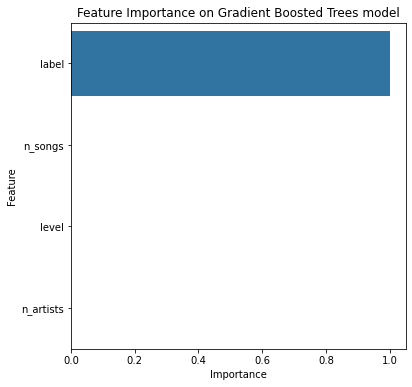

In [119]:
# Gradient Boosted Trees model has the best F1-score
# Let's see the importance feature of this model
# to do that, first we get the indices of the feature importances and convert them to a list
feat_imp_ind   = GBT_model.featureImportances.indices.tolist()
# and we get the feature names, from the original final_features except the label (churn)
features_without_label = final_features.columns[1:]
feat_imp_key   = [features_without_label[ind] for ind in feat_imp_ind]
# after that we get the weight, that is, the importance value and convert them to a list
feat_imp_value = GBT_model.featureImportances.values.tolist()
# next we get all together in a dataframe, to be able to display it with a nice sns barplot
feat_df        = pd.DataFrame(list(zip(features_without_label,feat_imp_value)),columns=['Feature','Importance']).sort_values('Importance',ascending=False)
# prepare the graphical details
plt.figure(figsize=(6,6))
plt.title("Feature Importance on Gradient Boosted Trees model")
sns.barplot(x='Importance', y='Feature', data=feat_df);
plt.savefig('Feature_Importance_GBT.png')

In [120]:
# Hyperparameter tuning

In [121]:
%%time
# Now I am going to fine-tune the Random Forest model
# as it is the one with the highest F1-Score
# Inspiration in https://gist.github.com/colbyford/7758088502211daa90dbc1b51c408762

# Create the initial RF Model

rf = RandomForestClassifier(featuresCol="features", labelCol="label", maxDepth=2)

# Prepare the parameters to find the best combination
rf_param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees,[15, 20, 25]) \
    .addGrid(rf.maxBins,[2, 4]) \
    .addGrid(rf.maxDepth,[2, 4]) \
    .build()

# Evaluate the model
rfevaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")

# Create 3-fold CrossValidator
rfcv = CrossValidator(estimator =rf,
                      estimatorParamMaps = rf_param_grid,
                      evaluator = rfevaluator,
                      numFolds = 3)

# Run Cross Validations
rfcvModel = rfcv.fit(train)
print(rfcvModel)

# Use test set here so we can measure the accuracy of our model on new data
rfpredictions = rfcvModel.transform(test)

# Evaluate best model
print('Accuracy:', rfevaluator.evaluate(rfpredictions))

CrossValidatorModel_846c5b9f1a06
Accuracy: 1.0
CPU times: user 34.9 s, sys: 25.8 s, total: 1min
Wall time: 22min 58s


In [122]:
best_model = rfcvModel.bestModel
#best_model = best_model.stages[2]
best_model.write().overwrite().save("Best_Random_Forest")

In [123]:
best_model_pred = best_model.transform(test)

In [124]:
y_true_best = best_model_pred.select("label").toPandas()
y_pred_best = best_model_pred.select("prediction").toPandas()

conf_matrix_RF_best = confusion_matrix(y_true_best, y_pred_best)
clas_rep_RF_best = classification_report(y_true_best, y_pred_best)

print("Best Random Forest Trees:\n")
print(conf_matrix_RF_best)
print("\n")
print(clas_rep_RF_best)

Best Random Forest Trees:

[[51  0]
 [ 0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        12

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

